https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data <-- this is the data set

Samples images for letter z


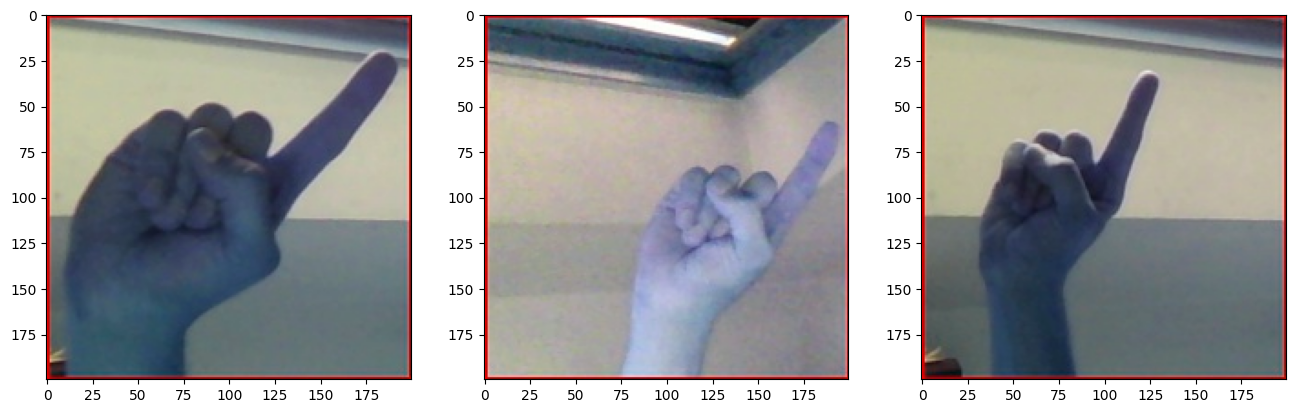

In [17]:
# Imports for Deep Learning

from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
import tensorflow as tf
tf.random.set_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = '../ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('z')

In [18]:
data_dir = "../ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/"
target_size = (64, 64)
target_dims = (64, 64, 3)
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True,
                                    samplewise_std_normalization = True,
                                    validation_split = val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, 
                                                    batch_size=batch_size, shuffle=True, subset="training")

val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")


Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [31]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

#my_model.fit_generator(train_generator, epochs=5, validation_data=val_generator)

In [6]:
import os 

# test_folder = f'{os.getcwd()}C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_test'
test_folder = r'C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_test\\asl_alphabet_test'
train_folder = r'C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_train\\asl_alphabet_train'

test_images = []
train_images = []

In [7]:
import numpy as np
def img_load(directory):
    images = []
    print(f'function length: {len(os.listdir(directory))}')
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
    
        try:
            img = cv2.resize(img, (224, 224))
        except Exception as e:
            print(os.path.join(directory, filename))
            os.remove(os.path.join(directory, filename))
            continue
        img = img.astype('float32') / 255.0
        images.append(img)

    return np.array(images)


def iterate_folders(directory):
    images = []
    #print(f'function length: {len(os.listdir(directory))}')
    for subfolder in os.listdir(directory):
        #print(subfolder)
        subfolder_path = os.path.join(directory, subfolder)
        #print(subfolder_path)
        if os.path.isdir(subfolder_path):
            #print(f"Subfolder: {subfolder_path}")
            for file in os.listdir(subfolder_path):
                # print(images)
                # print(file)
                file_path = os.path.join(subfolder_path, file)
                if os.path.isfile(file_path):
                    #print(f"File: {file_path}")
                    img = cv2.imread(file_path)
                    #print(os.path.join(directory, filename))
                    #print(type(img)
                    try:
                        img = cv2.resize(img, (224, 224))
                        #print(img)
                    except Exception as e:
                        #print(os.path.join(directory, filename))
                        #os.remove(os.path.join(directory, filename))
                        continue
                    img = img.astype('float32') / 255.0
                    images.append(img)
                    train_img = np.array(images)
                    np.savetxt('train_img.csv',train_img, delimiter=",")
def get_img_path(directory):
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        

def img_label(folder):
    data = np.array(folder)
    
    labels = []
    count = 0
    for i in folder:
        labels = np.append(labels, count)
        count += 1

    return labels


In [ ]:
train = iterate_folders(train_folder)
train_labels = img_label(train)

In [14]:
testTrain = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

trainGen = testTrain.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validationGen = testTrain.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [10]:
from sklearn.model_selection import train_test_split

dataset = tf.keras.utils.image_dataset_from_directory(
    train_folder,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    # batch_size=28,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,        
)




Found 87000 files belonging to 29 classes.


In [42]:
#my_model.fit_generator(trainGen, epochs=5, validation_data =validationGen)
my_model.fit_generator(train_generator, epochs=5, validation_data=validationGen)

Epoch 1/5


C:\Users\noahf\AppData\Local\Temp\ipykernel_14192\3974354584.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_model.fit_generator(train_generator, epochs=5, validation_data=validationGen)


  32/1224 [..............................] - ETA: 32:03 - loss: 3.3539 - accuracy: 0.0327